## False discovery rate as discussed by Wilks (2016, BAMS)

In [1]:
using PyPlot
using Distributions

In [2]:
# Hardwire the following
α = 0.05
n = 30

xs = -50:50
ys = -50:50
locX = [x for x in xs, y in ys]
locY = [y for x in xs, y in ys];

In [3]:
# Compute a hypothetical teleconnection map
σ = 30
amp = exp.(-(locX.^2 + locY.^2) ./ (2*σ^2))
r = amp .* cosd.(180*locX/30) .* cosd.(180*locY/30);

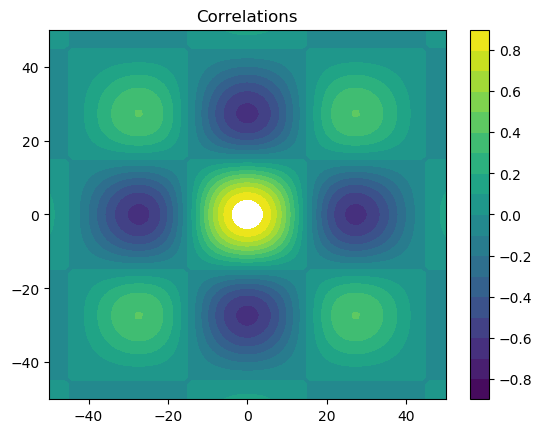

PyObject Text(0.5, 1.0, 'Correlations')

In [4]:
# Plot the correlations
figure()
contourf(locX, locY, r, -.9:.1:.9, extend="max")
colorbar()
title("Correlations")

In [5]:
# Compute the f test for the correlations
r2 = r.^2 
for i in eachindex(r2)
    r2[i] = ifelse(r2[i] < 0.001, 0.001, r2[i])
    r2[i] = ifelse(r2[i] > 0.999, 0.999, r2[i])
end

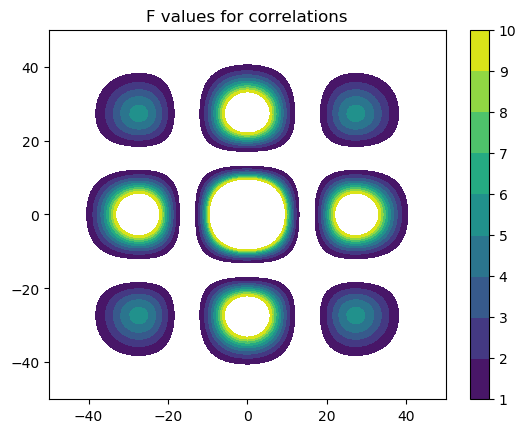

PyObject Text(0.5, 1.0, 'F values for correlations')

In [6]:
figure()
f = ((n - 2) * r2) ./ (1 .- r2)
contourf(locX, locY, f, 1:10, extend="max")
colorbar()
title("F values for correlations")

In [7]:
fdist = FDist(1, n)
f_null = quantile(fdist, 1-α)
p = 1 .- cdf.(fdist, f);

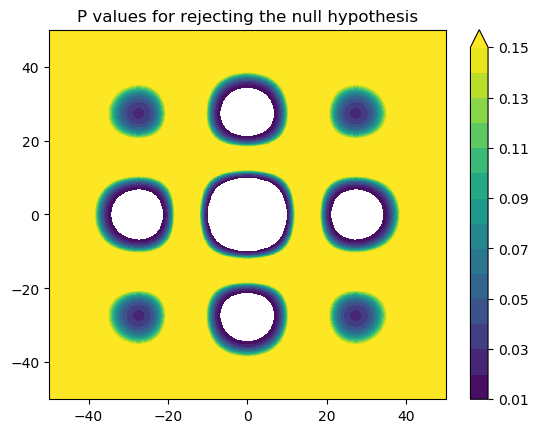

PyObject Text(0.5, 1.0, 'P values for rejecting the null hypothesis')

In [12]:
figure()
contourf(locX, locY, p, 0.01:0.01:0.15, extend="max")
colorbar()
title("P values for rejecting the null hypothesis")

In [9]:
# Find the locations where the null hypothesis could be rejected locally
rej_null_cart = findall(p .< α)
number_rej_null = length(rej_null_cart)

# Sort from smallest to largest the p values that would suggest the null hypothesis could be rejected locally
p_rej = p[rej_null_cart]
rej_sort_lin = sortperm(p_rej)
p_rej_sorted = p_rej[rej_sort_lin]
rej_cart_sorted = rej_null_cart[rej_sort_lin]

p_local_rej = ones(101, 101)
p_fdr_rej = ones(101, 101)
number_grid_points = 101*101

# Loop over all the cases where the null hypothesis is assumed to be rejected locally
for (i, p_i) in enumerate(p_rej_sorted)
    p_local_rej[rej_cart_sorted[i]] = p_i
    
    # Compute fdr threshold
    fdr_thres = 2 * α * i / number_grid_points
    
    # Find local p values that are less than fdr threshold
    if p_i < fdr_thres
        p_fdr_rej[rej_cart_sorted[i]] = p_i
    end
end

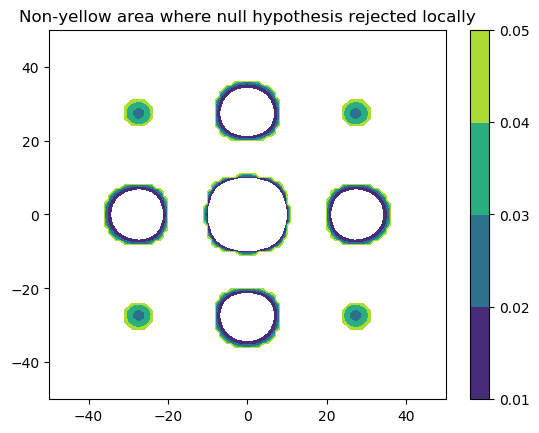

PyObject Text(0.5, 1.0, 'Non-yellow area where null hypothesis rejected locally')

In [10]:
figure()
contourf(locX, locY, p_local_rej, 0.01:0.01:0.05, extend="max")
colorbar()
title("Non-yellow area where null hypothesis rejected locally")

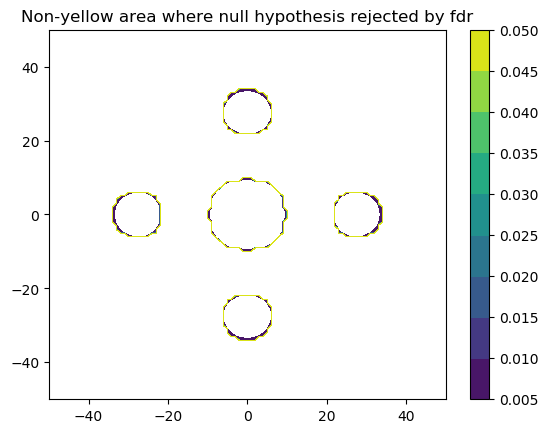

PyObject Text(0.5, 1.0, 'Non-yellow area where null hypothesis rejected by fdr')

In [11]:
figure()
contourf(locX, locY, p_fdr_rej, 0.005:0.005:0.05, extend="max")
colorbar()
title("Non-yellow area where null hypothesis rejected by fdr")